# Projeto Fase 5 - Machine Learning na Cabeça
## FarmTech Solutions - Análise de Rendimento de Safra

Este notebook contém a análise de dados e modelagem para prever o rendimento de safras agrícolas com base em condições climáticas e de solo.

## Fase 1: Preparação do Ambiente e Dados

Nesta fase inicial, vamos configurar o ambiente de desenvolvimento e realizar a carga inicial dos dados para análise.

### 1. Importação das Bibliotecas Necessárias

Vamos importar as bibliotecas que serão utilizadas ao longo do projeto.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para clusterização e modelagem
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Para regressão (modelos preditivos)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)

### 2. Carregamento do Dataset

Vamos carregar o dataset "crop_yield.csv" que contém informações sobre condições climáticas e rendimento de diferentes culturas agrícolas.

In [2]:
# Carregando o dataset crop_yield.csv
try:
    df = pd.read_csv('../crop_yield.csv')
    print("Dataset carregado com sucesso!")
except FileNotFoundError:
    print("Erro: O arquivo 'crop_yield.csv' não foi encontrado.")
    print("Por favor, verifique se o arquivo está no diretório correto.")

# Exibindo os primeiros registros
df.head()

Dataset carregado com sucesso!


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


### 3. Verificação Inicial dos Dados

Vamos verificar as dimensões do dataset e algumas estatísticas básicas para entender melhor os dados.

In [3]:
# Verificando as dimensões do dataset
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

# Verificando os tipos de dados
print("\nTipos de dados:")
print(df.dtypes)

# Verificando se há valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

O dataset possui 156 linhas e 6 colunas.

Tipos de dados:
Crop                                     object
Precipitation (mm day-1)                float64
Specific Humidity at 2 Meters (g/kg)    float64
Relative Humidity at 2 Meters (%)       float64
Temperature at 2 Meters (C)             float64
Yield                                     int64
dtype: object

Valores ausentes por coluna:
Crop                                    0
Precipitation (mm day-1)                0
Specific Humidity at 2 Meters (g/kg)    0
Relative Humidity at 2 Meters (%)       0
Temperature at 2 Meters (C)             0
Yield                                   0
dtype: int64


In [4]:
# Estatísticas descritivas básicas
df.describe()

,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


### 4. Verificação das Culturas Presentes no Dataset

Vamos verificar quais culturas estão presentes no dataset e quantos registros existem para cada uma.

Culturas presentes no dataset:
Crop
Cocoa, beans       39
Oil palm fruit     39
Rice, paddy        39
Rubber, natural    39
Name: count, dtype: int64


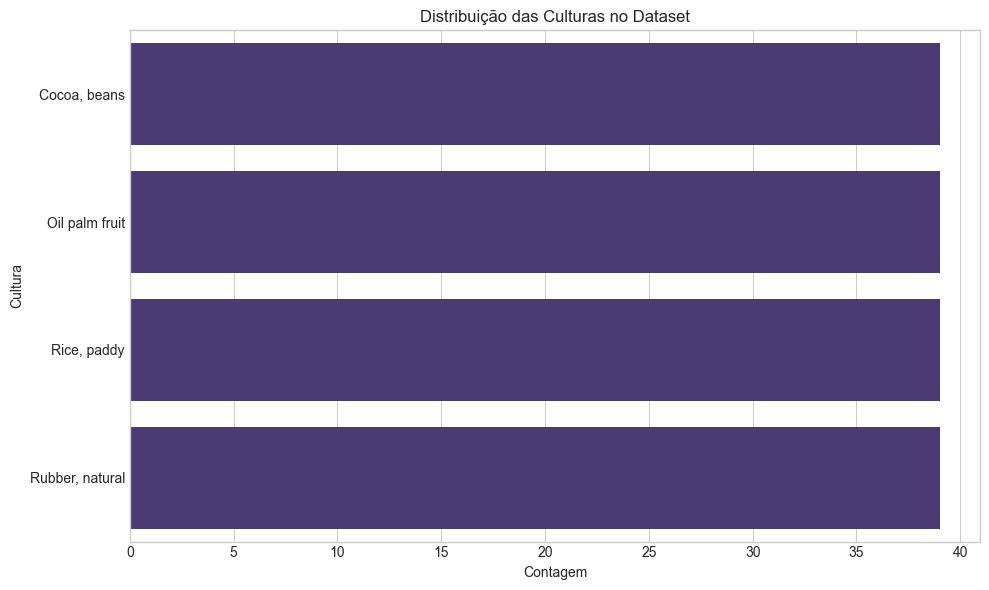

In [5]:
# Verificando as culturas presentes no dataset
print("Culturas presentes no dataset:")
crop_counts = df['Crop'].value_counts()
print(crop_counts)

# Visualizando a distribuição das culturas
plt.figure(figsize=(10, 6))
sns.countplot(y='Crop', data=df, order=df['Crop'].value_counts().index)
plt.title('Distribuição das Culturas no Dataset')
plt.xlabel('Contagem')
plt.ylabel('Cultura')
plt.tight_layout()
plt.show()

## Conclusão da Fase 1

Nesta fase inicial, realizamos as seguintes tarefas:

1. Configuramos o ambiente de desenvolvimento com as bibliotecas necessárias
2. Carregamos o dataset "crop_yield.csv"
3. Verificamos as dimensões e tipos de dados do dataset
4. Identificamos as culturas presentes no dataset e sua distribuição

Na próxima fase (Fase 2), realizaremos uma análise exploratória mais detalhada dos dados para entender melhor as relações entre as variáveis e identificar padrões importantes.